### 농어의 길이로 무게 예측하기

In [2]:
# 모델 적합성 검정을 위한 함수 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_predict):
    MSE = mean_squared_error(y_test,y_predict,squared=True)
    RMSE = mean_squared_error(y_test,y_predict,squared=False)
    MAE = mean_absolute_error(y_test,y_predict)
    R2 = r2_score(y_test,y_predict)
    
    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

### 0. 데이터 탐색 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

# 데이터 로드
fish_df = pd.read_csv('./data/fish.csv')
fish_df.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


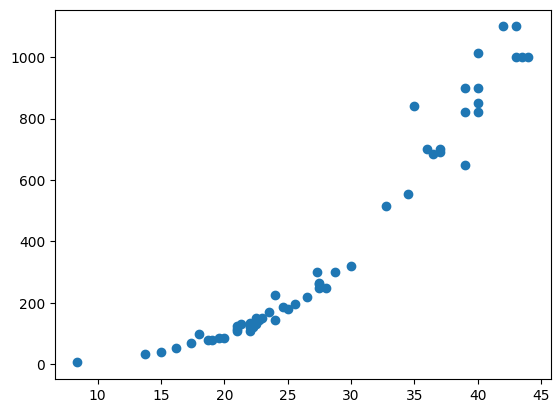

In [4]:
# 산점도로 데이터 확인
plt.scatter(fish_df['길이'], fish_df['무게'])
plt.show()

<Axes: >

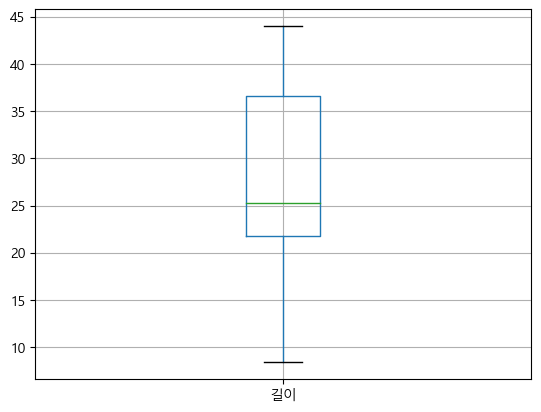

In [5]:
# 폰트설정
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
fish_df[['길이']].boxplot()

<Axes: >

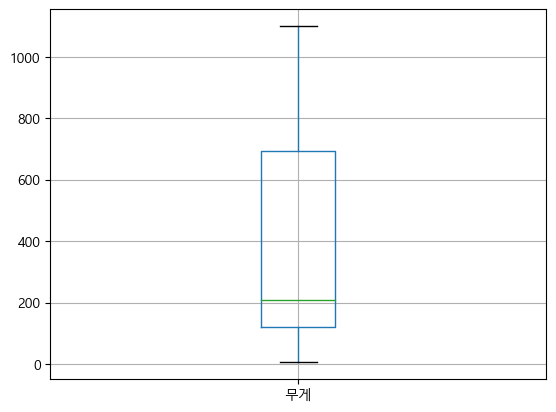

In [6]:
fish_df[['무게']].boxplot()

```
분포의 형태를 확인하고 
이상치 없음을 확인 
```

### 1. 선형회귀모델(단순)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
## 데이터 분석 
# 데이터 전처리

x_data = fish_df[['길이']]
y_data = fish_df[['무게']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)


In [9]:
# 모델생성 
model = LinearRegression()

# 모델학습
model.fit(x_train, y_train)

# 모델검증 
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

## R 계수 도메인지식 필요 ! 분야마다 다름 
## 소득별 정치적 지향성 판단 


0.8970713235319303
0.953804642867561


In [10]:
# 모델예측 
y_predict = model.predict(x_test)
print(y_predict)

[[134.74839429]
 [205.40635641]
 [770.67005335]
 [805.99903441]
 [876.65699652]
 [ 53.49173786]
 [170.07737535]
 [929.65046811]
 [770.67005335]
 [134.74839429]
 [223.07084694]
 [170.07737535]
 [145.34708861]
 [700.01209123]
 [357.32097496]
 [ 28.76145112]
 [364.38677117]]


In [11]:
# 모델의 평가척도 
evaluate_reg_all(y_test, y_predict)

MSE: 6205.106, RMSE: 78.772, MAE: 59.547, R^2: 0.954


## 2. 선형회귀분석(다중)

In [19]:
# 데이터 전처리 
from sklearn.preprocessing import PolynomialFeatures

# degree(차수) = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
# include_bias = True로 할 경우 편향을 위한 변수(x0) 1이 추가된다  
poly = PolynomialFeatures(degree=2, include_bias= False)
# poly = PolynomialFeatures(degree=2, include_bias= True)

poly.fit(x_train)
poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)
print(poly.get_feature_names_out()) # 특성이 어떻게 만들어졌는지 출력 
print(poly_train) # 기존값과 제곱값이 같이 출력된다! 

['길이' '길이^2']
[[  36.   1296.  ]
 [  44.   1936.  ]
 [  39.   1521.  ]
 [  22.7   515.29]
 [  37.   1369.  ]
 [  22.5   506.25]
 [   8.4    70.56]
 [  32.8  1075.84]
 [  25.    625.  ]
 [  17.4   302.76]
 [  27.5   756.25]
 [  13.7   187.69]
 [  28.    784.  ]
 [  30.    900.  ]
 [  21.    441.  ]
 [  16.2   262.44]
 [  28.7   823.69]
 [  40.   1600.  ]
 [  24.    576.  ]
 [  19.    361.  ]
 [  34.5  1190.25]
 [  27.5   756.25]
 [  35.   1225.  ]
 [  25.6   655.36]
 [  36.5  1332.25]
 [  20.    400.  ]
 [  26.5   702.25]
 [  22.    484.  ]
 [  19.6   384.16]
 [  24.    576.  ]
 [  40.   1600.  ]
 [  22.5   506.25]
 [  22.    484.  ]
 [  40.   1600.  ]
 [  43.   1849.  ]
 [  15.    225.  ]
 [  22.3   497.29]
 [  24.6   605.16]
 [  43.   1849.  ]]


In [20]:
# 모델생성
lr = LinearRegression()
# 모델학습
lr.fit(poly_train, y_train)

# 모델예측 
y_predict = lr.predict(poly_test)

In [21]:
# coef_ 기울기
# 절편
print(lr.coef_, lr.intercept_)

[[-22.23709573   1.01504484]] [127.32581303]


---
**[방정식]** 

$ y = 1.01 * x^2 -21.6 *  x + 111.35$
---

In [15]:
# 모델의 평가척도
evaluate_reg_all(y_test, y_predict)

MSE: 1959.683, RMSE: 44.268, MAE: 28.313, R^2: 0.985


### 3. 결정트리회귀모형

In [16]:
from sklearn.tree import DecisionTreeRegressor

# 모델생성
model = DecisionTreeRegressor() 

# 여러 속성값 

# 모델 학습 
model.fit(x_train, y_train)

# 모델검증
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9935481175562422
0.9543268830465972


In [17]:
# 모델 예측
y_predict = model.predict(x_test)

# 모델 평가척도
evaluate_reg_all(y_test, y_predict)

MSE: 6134.958, RMSE: 78.326, MAE: 44.039, R^2: 0.954


### 4. K최근접 이웃모델

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# 모델 생성
model = KNeighborsRegressor()

# 모델 학습
model.fit(x_train, y_train)

# 모델 검증 
print(model.score(x_train, y_train)) 
print(model.score(x_test, y_test)) 

# 모델 예측 
y_predict = model.predict(x_test)

evaluate_reg_all(y_test, y_predict)



0.9691489291318911
0.989120088531006
MSE: 1461.424, RMSE: 38.229, MAE: 23.618, R^2: 0.989
